<a href="https://colab.research.google.com/github/LokeshJatangi/EVA-vision/blob/master/Project%204/Assignment%204B/code%20-%201" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Architecture

In this notebook , the neural architecture is concluded , after few trials on different architectures.

The Architecture is concluded on the following points:
 
 **1**)  The architecture should have less than 15K parameters.
 
 **2**) The architecture selected must have maximum training accuracy out of all the trails on different            architecture **(** Consider only first few epochs **)**.
 
 **3**) If two or more architectures have almost same training accuracy , then the potential of the                      architecture is considered based on the difference between the training and validation accuracy.

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


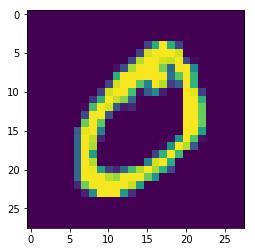

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26

model.add(Convolution2D(10, 3, 3, activation='relu')) #24

model.add(Convolution2D(30, 3, 3, activation='relu'))#22

model.add(MaxPooling2D(pool_size=(2, 2)))#11
model.add(Convolution2D(10, 1, 1, activation='relu')) #11



model.add(Convolution2D(10, 3, 3, activation='relu'))#9

model.add(Convolution2D(18, 3, 3, activation='relu'))#7

model.add(Convolution2D(30, 3, 3, activation='relu'))#5
model.add(Convolution2D(10, 1, activation='relu')) #5


model.add(Convolution2D(10, 5, 5))



model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 30)        2730      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 10)        310       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 18)          1638      
__________

In [9]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test),)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 254us/step - loss: 0.2239 - acc: 0.9286 - val_loss: 0.0728 - val_acc: 0.9769
Epoch 2/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.0794 - acc: 0.9763 - val_loss: 0.0563 - val_acc: 0.9808
Epoch 3/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0597 - acc: 0.9818 - val_loss: 0.0704 - val_acc: 0.9799
Epoch 4/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0487 - acc: 0.9847 - val_loss: 0.0424 - val_acc: 0.9865
Epoch 5/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0415 - acc: 0.9869 - val_loss: 0.0388 - val_acc: 0.9860
Epoch 6/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0360 - acc: 0.9888 - val_loss: 0.0420 - val_acc: 0.9876
Epoch 7/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0325 - acc: 0.9900 - val_loss: 0.

In [10]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.034693267246846196, 0.9917]


The Training accuracy obtanied for 10 epochs is 99.23%  and validation accuracy is 98.98% .

To check the potential the NN network and to decide on which hyperparameter to be added for the second version of code .


The NN was iterated for 20 epochs and accuracies found were :



Training accuracy  = 99.60 ,

Validation accuracy = 99.17 .

As the difference between Training accuracy and Validation accuracy is approximately  0.5% , So in the next part the Batch Normalization is added.


